In [ ]:
# Step 1: Load Required Libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import networkx as nx
from networkx.algorithms import community
import itertools
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Step 2: Load and Preprocess the Corpus
reviews_data = pd.read_csv('/content/Reviews2.csv')


In [ ]:
# Display the first few rows of the dataset
print("Dataset Head:")
print(reviews_data.head())

Dataset Head:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality ca

In [ ]:
# Preprocess text data
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert text to lowercase
    return text


In [ ]:
reviews_data['clean_review'] = reviews_data['Text'].apply(preprocess_text)

In [ ]:
# Display preprocessed review texts
print("\nPreprocessed Review Texts:")
print(reviews_data.head())



Preprocessed Review Texts:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of 

In [ ]:
# Step 3: Sentiment Analysis
# Initialize the Sentiment Intensity Analyzer
#sid = SentimentIntensityAnalyzer()

# Step 3: Sentiment Analysis
sid = SentimentIntensityAnalyzer()
reviews_data['Sentiment_Score'] = reviews_data['Text'].apply(lambda review: sid.polarity_scores(review)['compound'])


In [ ]:
# Step 4: Create Bag-of-Words Representation
# Create a dictionary from the preprocessed reviews
#Tokenize each string in the 'clean_review' column and store the tokens in a new list
tokenized_reviews = [word_tokenize(review) for review in reviews_data['clean_review']]

# Create a dictionary from the tokenized reviews
dictionary = corpora.Dictionary(tokenized_reviews)

# Convert each tokenized review into a bag-of-words representation
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_reviews]

In [ ]:
# Step 5: Topic Modeling with LDA
# Choose the number of topics (k)
num_topics = 5

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

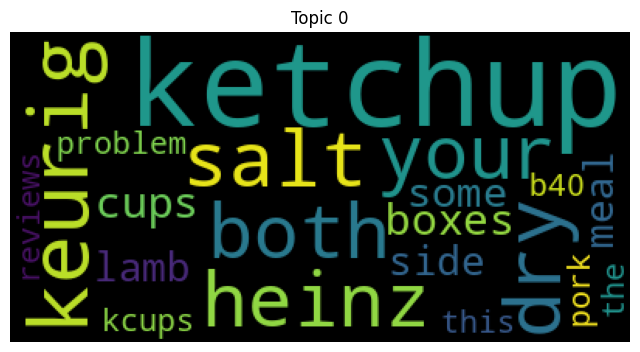

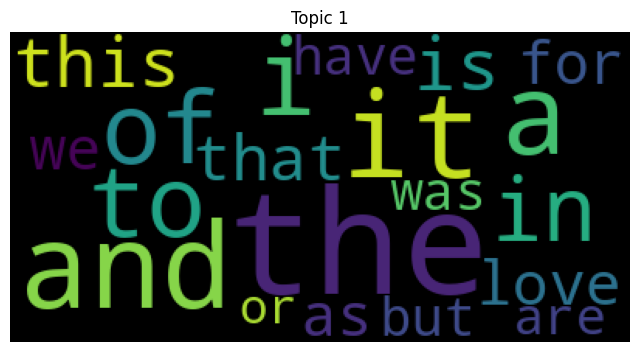

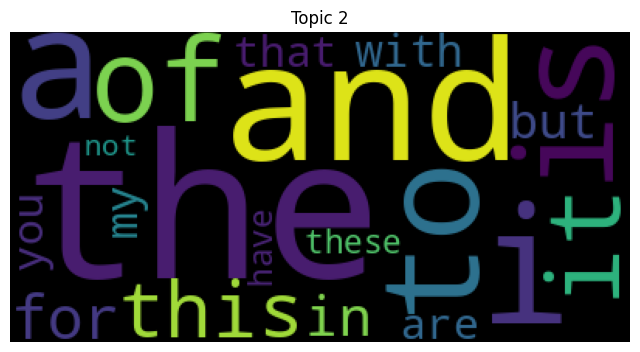

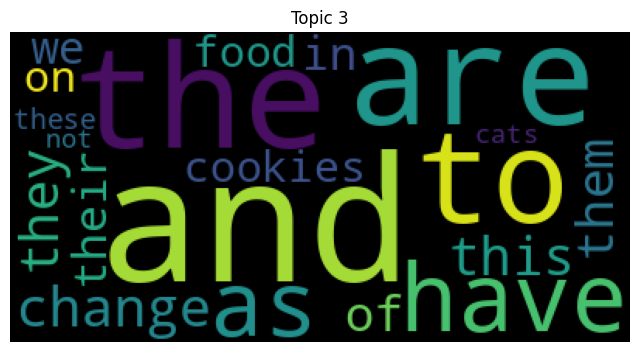

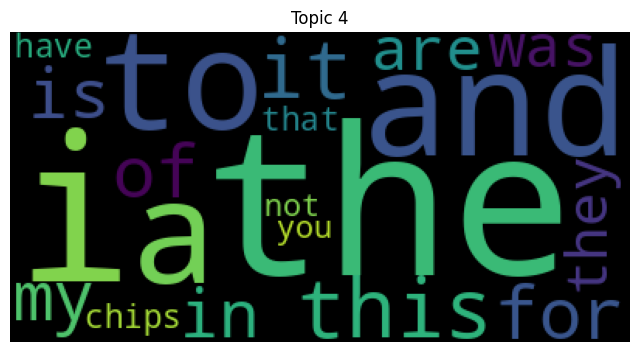

In [ ]:
# Step 6: Visualize the Results
# Visualize topic-specific keywords using word clouds
for i in range(num_topics):
    plt.figure(figsize=(8, 6))
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(i, 20))))
    plt.axis('off')
    plt.title('Topic ' + str(i))
    plt.show()


#EXP6 in middle😅

In [ ]:
# Step 7: Community Detection
G = nx.Graph()
for i, row in reviews_data.iterrows():
  G.add_node(i, sentiment=row['Sentiment_Score'])
for i, row1 in reviews_data.iterrows():
  for j, row2 in itertools.islice(reviews_data.iterrows(), i + 1, None):
    if row1['Sentiment_Score'] * row2['Sentiment_Score'] < 0:
      G.add_edge(i, j)
communities = community.greedy_modularity_communities(G)

In [ ]:
# Step 8: Influence Analysis and Visualization of Communities
print("Community Detection Results:")
for i, community in enumerate(communities):
  print("Community", i, ":", community)

Community Detection Results:
Community 0 : frozenset({0, 1, 5, 8, 12, 15, 18, 21, 24, 29, 32, 35, 38, 41, 44, 48, 50, 54, 57, 60, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 95, 98, 99, 102, 105, 108, 111, 114, 117, 120, 124, 127, 130, 134, 137, 138, 141, 144, 147, 150, 153, 157, 161, 162, 165, 169, 171, 174, 177, 180, 183, 187, 190, 193, 196, 199, 202, 205, 208, 211, 215, 216, 219, 222, 227, 230, 233, 235, 237, 240, 244, 247, 250, 255, 257, 259, 262, 266, 270, 273, 276, 279, 282, 285, 288, 291, 294, 295, 298, 301, 304, 308, 313, 316, 319, 324, 327, 328, 332, 335, 338, 341, 344, 347, 351, 354, 357, 360, 361, 364, 367, 370, 373, 376, 379, 383, 386, 389, 394, 397, 401, 402, 406, 409, 412, 415, 419, 420, 424, 427, 430, 433, 436, 439, 442, 445, 448, 451, 454, 458, 461, 464, 467, 468, 471, 474, 477, 481, 484, 488, 491, 494, 497})
Community 1 : frozenset({2, 6, 9, 11, 13, 16, 19, 22, 27, 30, 33, 36, 39, 42, 46, 49, 52, 55, 58, 61, 65, 68, 71, 74, 77, 80, 83, 86, 89, 92, 96, 100, 103, 106, 109, 1

Influence Analysis Results:
Graph is not connected.
Connected Component 0 Influence Analysis:
Nodes: 489
Edges: 21168
Average Shortest Path Length: 1.8225887559086795
Clustering Coefficient: 0.0
Betweenness Centrality: {0: 2.1525424388626388e-05, 1: 0.017009879826303448, 2: 2.1525424388626388e-05, 4: 2.1525424388626388e-05, 5: 2.1525424388626388e-05, 6: 2.1525424388626388e-05, 7: 2.1525424388626388e-05, 8: 2.1525424388626388e-05, 9: 2.1525424388626388e-05, 10: 2.1525424388626388e-05, 11: 0.017009879826303448, 12: 2.1525424388626388e-05, 13: 2.1525424388626388e-05, 14: 2.1525424388626388e-05, 15: 2.1525424388626388e-05, 16: 2.1525424388626388e-05, 17: 2.1525424388626388e-05, 18: 2.1525424388626388e-05, 19: 2.1525424388626388e-05, 20: 2.1525424388626388e-05, 21: 2.1525424388626388e-05, 22: 2.1525424388626388e-05, 23: 2.1525424388626388e-05, 24: 2.1525424388626388e-05, 26: 0.017009879826303448, 27: 2.1525424388626388e-05, 28: 2.1525424388626388e-05, 29: 2.1525424388626388e-05, 30: 2.15254

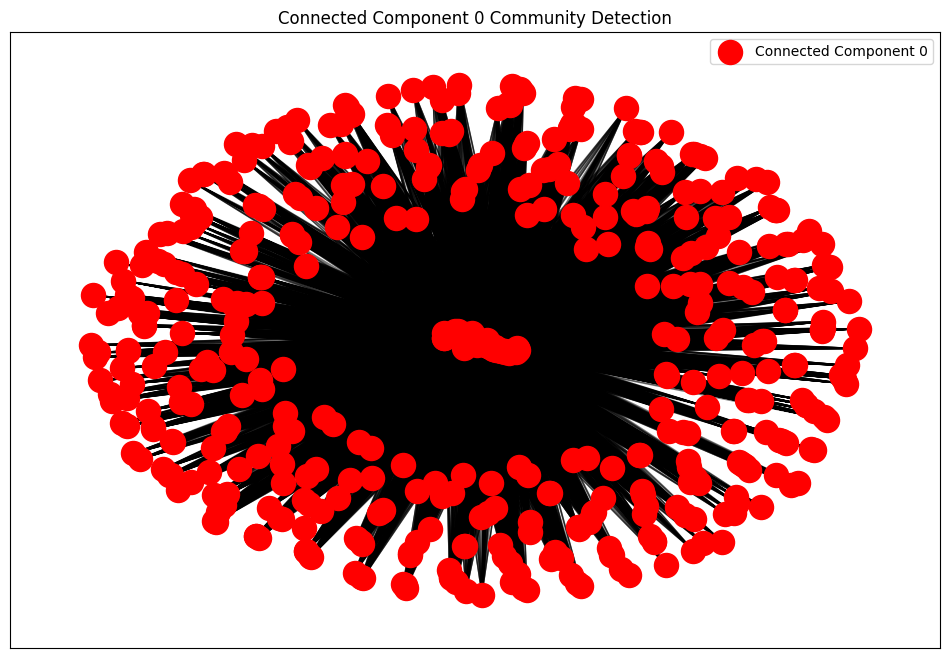

Connected Component 1 Influence Analysis:
Nodes: 1
Edges: 0
Average Shortest Path Length: 0
Clustering Coefficient: 0.0
Betweenness Centrality: {3: 0.0}


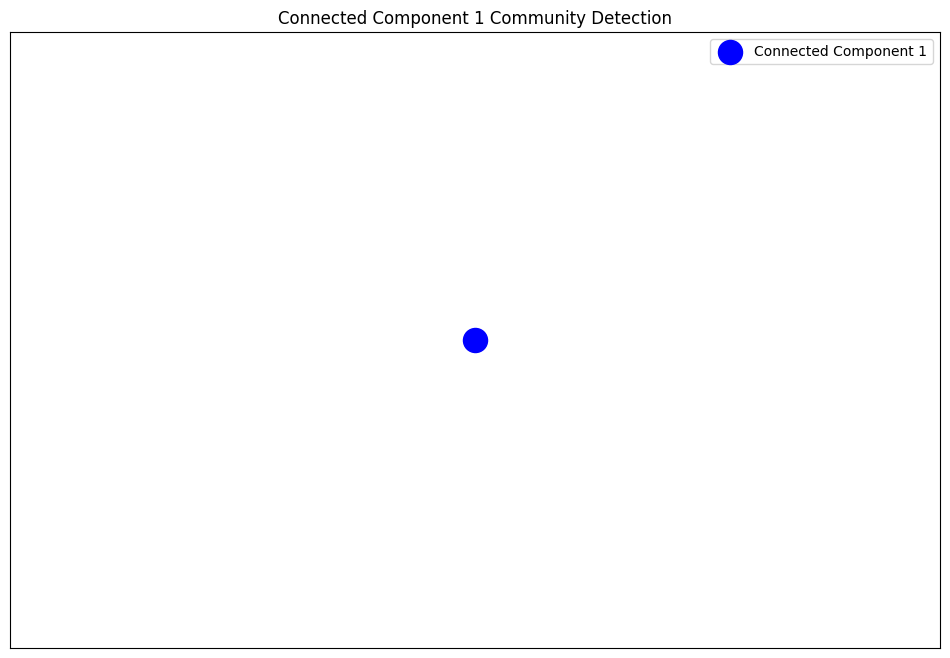

Connected Component 2 Influence Analysis:
Nodes: 1
Edges: 0
Average Shortest Path Length: 0
Clustering Coefficient: 0.0
Betweenness Centrality: {25: 0.0}


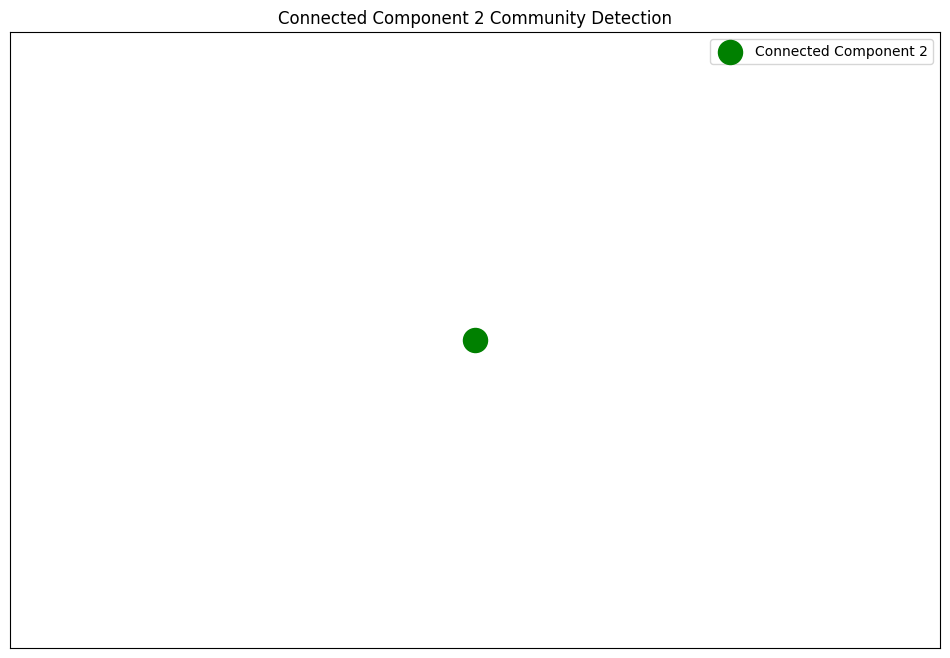

Connected Component 3 Influence Analysis:
Nodes: 1
Edges: 0
Average Shortest Path Length: 0
Clustering Coefficient: 0.0
Betweenness Centrality: {45: 0.0}


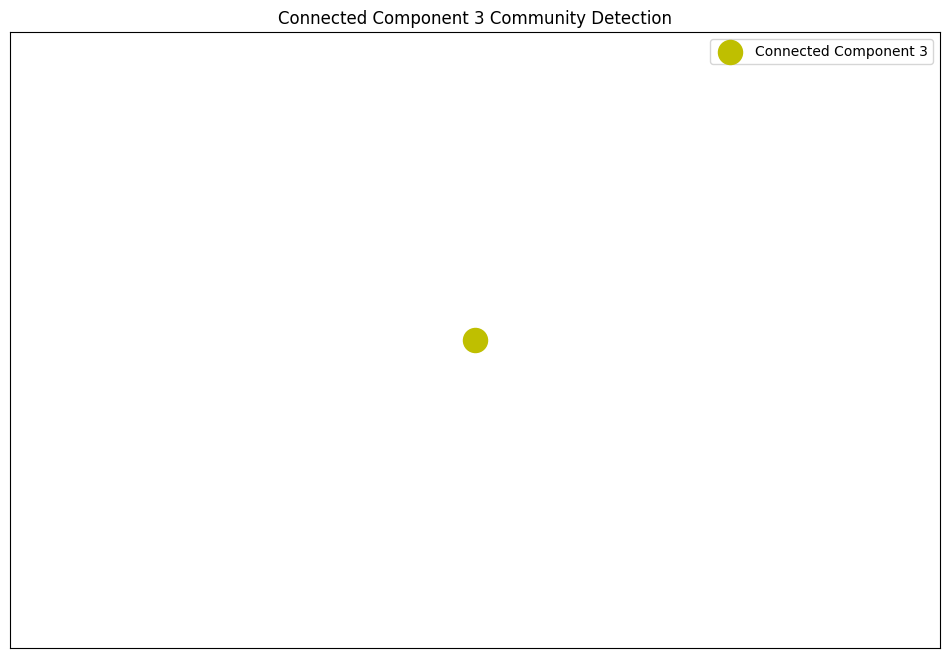

Connected Component 4 Influence Analysis:
Nodes: 1
Edges: 0
Average Shortest Path Length: 0
Clustering Coefficient: 0.0
Betweenness Centrality: {62: 0.0}


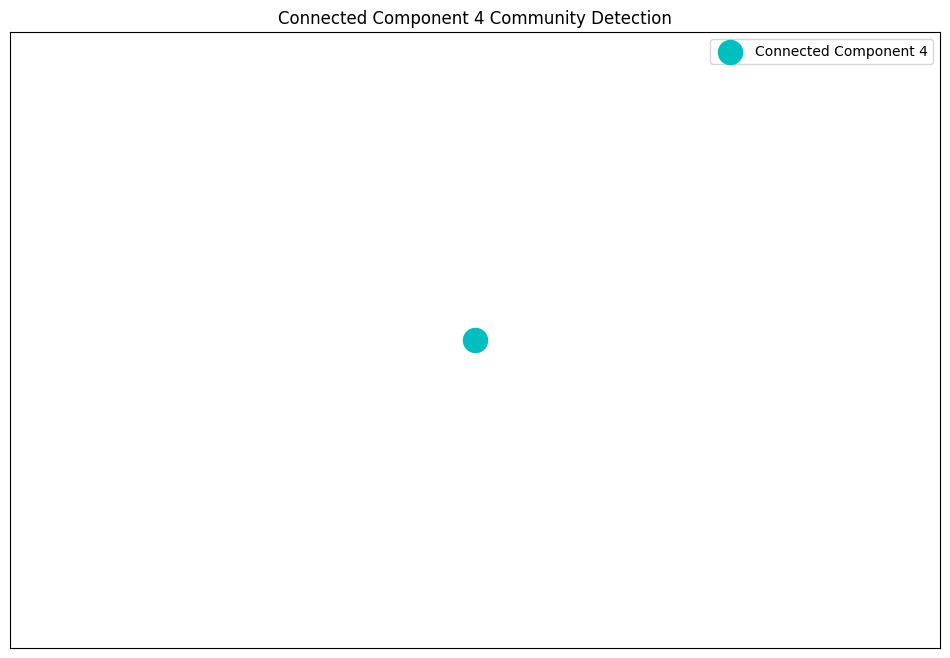

Connected Component 5 Influence Analysis:
Nodes: 1
Edges: 0
Average Shortest Path Length: 0
Clustering Coefficient: 0.0
Betweenness Centrality: {94: 0.0}


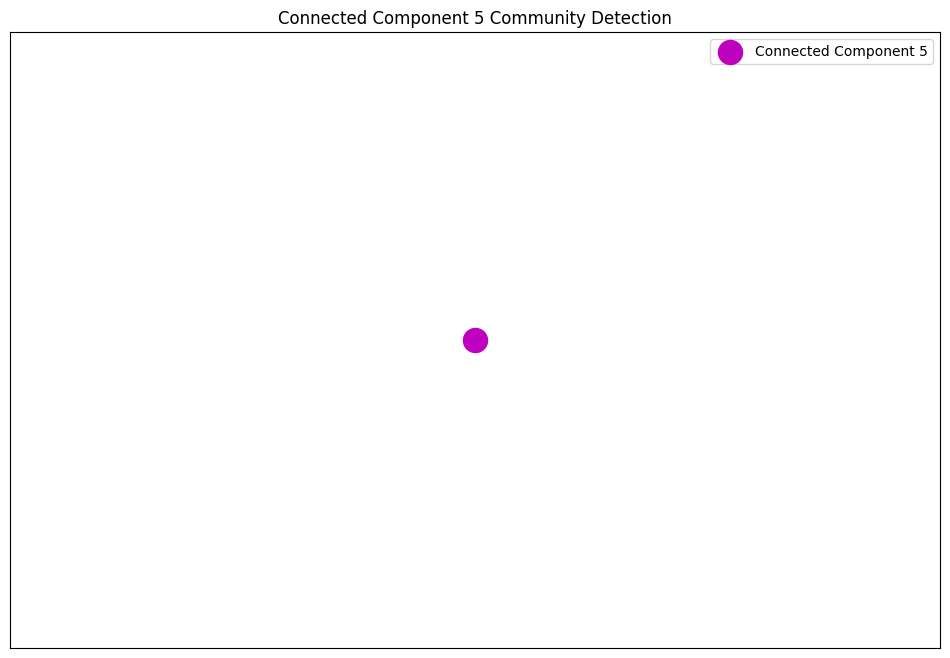

Connected Component 6 Influence Analysis:
Nodes: 1
Edges: 0
Average Shortest Path Length: 0
Clustering Coefficient: 0.0
Betweenness Centrality: {243: 0.0}


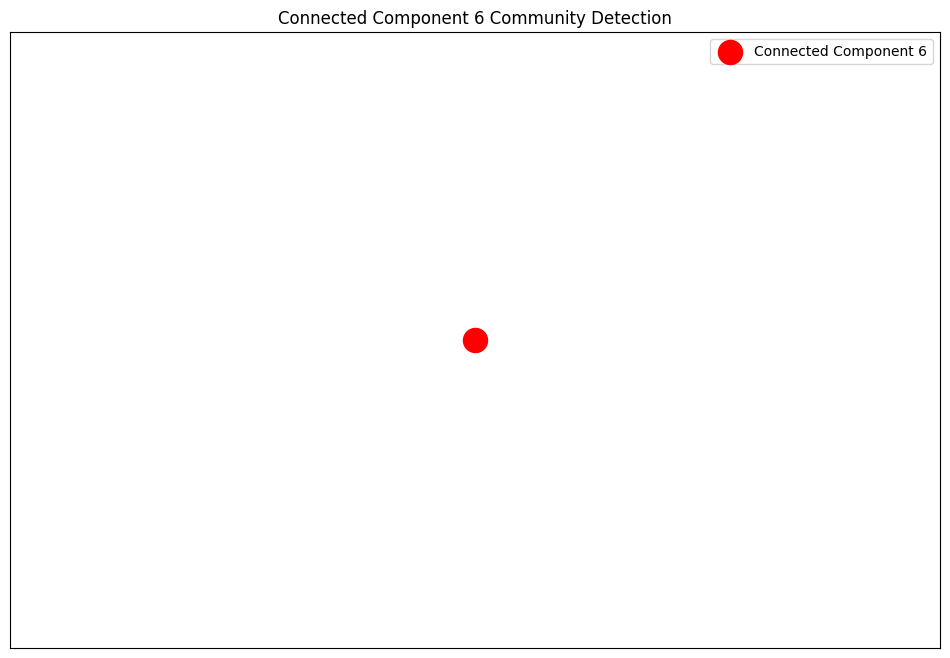

Connected Component 7 Influence Analysis:
Nodes: 1
Edges: 0
Average Shortest Path Length: 0
Clustering Coefficient: 0.0
Betweenness Centrality: {312: 0.0}


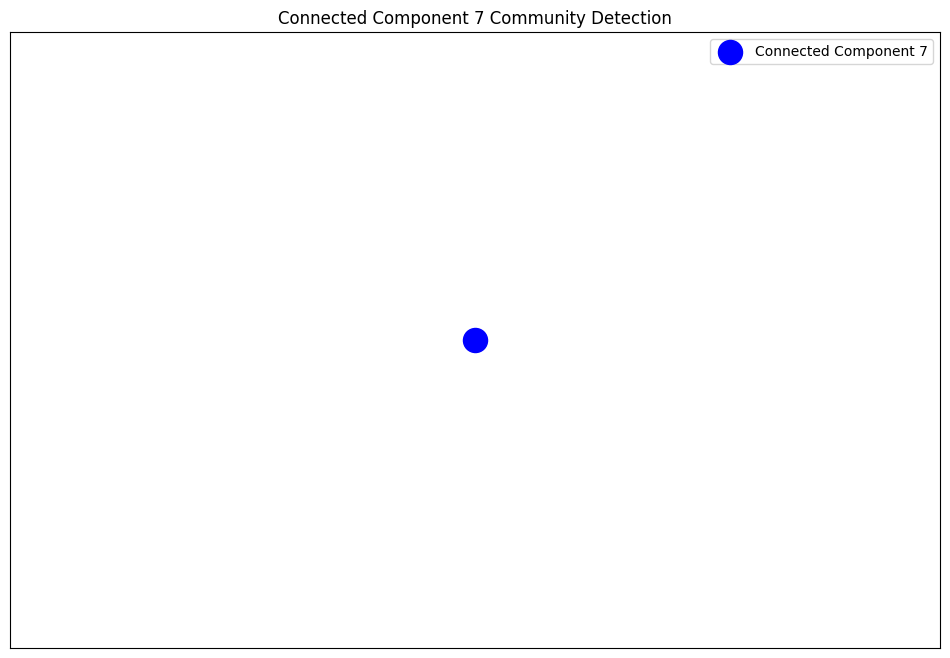

Connected Component 8 Influence Analysis:
Nodes: 1
Edges: 0
Average Shortest Path Length: 0
Clustering Coefficient: 0.0
Betweenness Centrality: {321: 0.0}


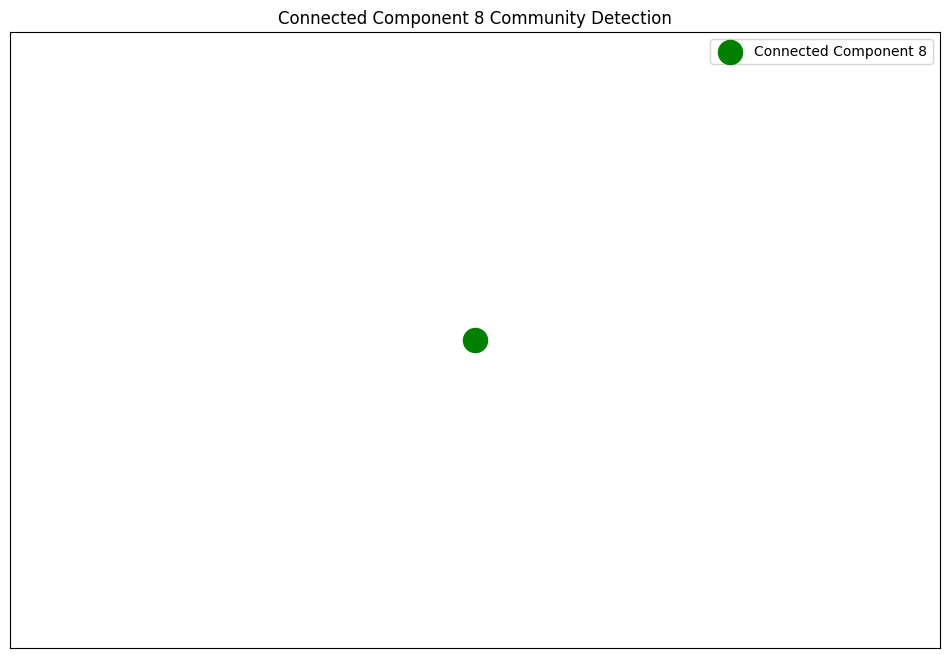

Connected Component 9 Influence Analysis:
Nodes: 1
Edges: 0
Average Shortest Path Length: 0
Clustering Coefficient: 0.0
Betweenness Centrality: {323: 0.0}


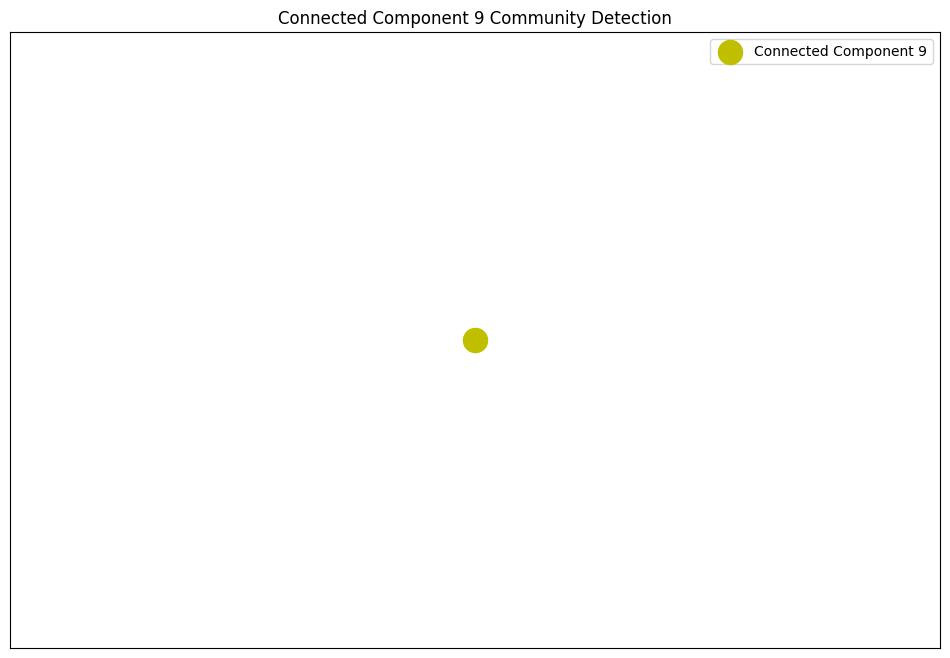

Connected Component 10 Influence Analysis:
Nodes: 1
Edges: 0
Average Shortest Path Length: 0
Clustering Coefficient: 0.0
Betweenness Centrality: {393: 0.0}


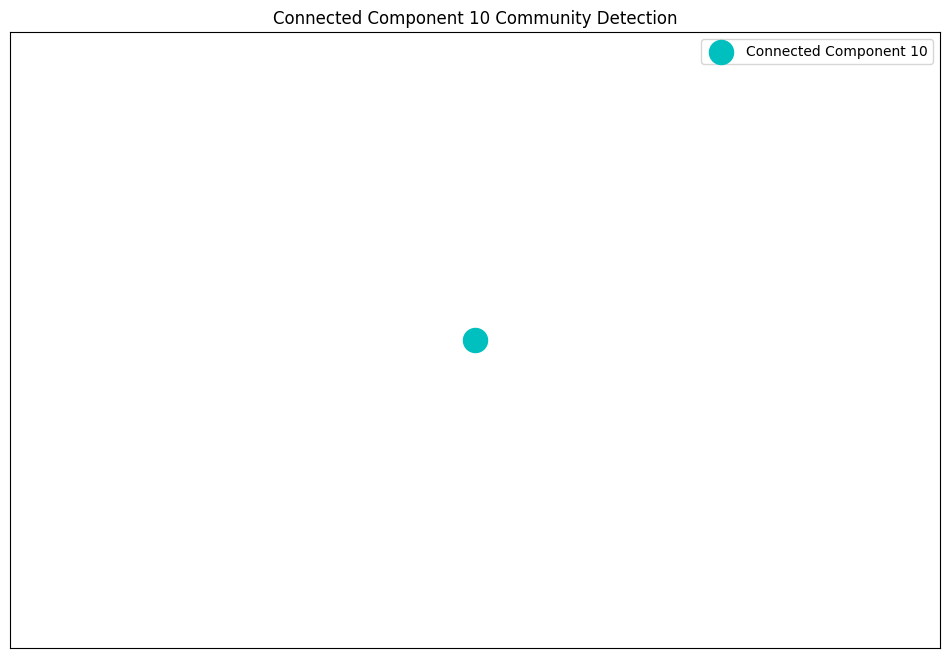

Connected Component 11 Influence Analysis:
Nodes: 1
Edges: 0
Average Shortest Path Length: 0
Clustering Coefficient: 0.0
Betweenness Centrality: {400: 0.0}


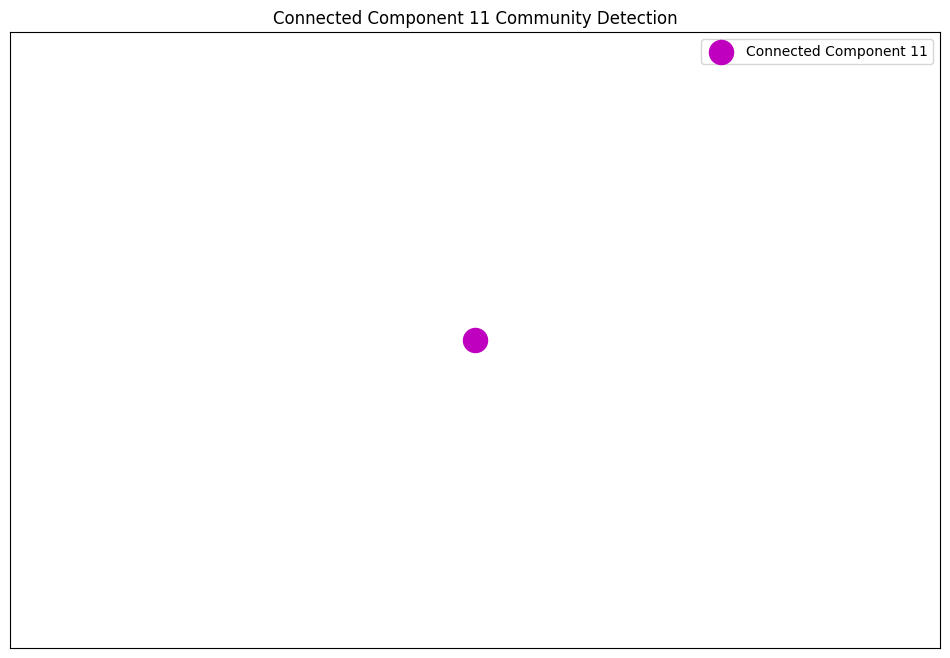

In [ ]:
print("Influence Analysis Results:")
if nx.is_connected(G):
    print("Average Shortest Path Length:", nx.average_shortest_path_length(G))
    print("Clustering Coefficient:", nx.average_clustering(G))
    print("Betweenness Centrality:", nx.betweenness_centrality(G))

    # Visualization of Communities
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)  # Layout for better visualization
    colors = ['r', 'b', 'g', 'y', 'c', 'm']
    for i, community in enumerate(communities):
        color_index = i % len(colors)  # Ensure cyclic indexing of colors
        nx.draw_networkx_nodes(G, pos, nodelist=list(community),
                               node_color=colors[color_index], label="Community {}".format(i))
        nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title("Community Detection")
    plt.legend()
    plt.show()
else:
    print("Graph is not connected.")
    # Analyze connected components separately
    connected_components = list(nx.connected_components(G))
    for i, component in enumerate(connected_components):
        subgraph = G.subgraph(component)
        print("Connected Component", i, "Influence Analysis:")
        print("Nodes:", subgraph.number_of_nodes())
        print("Edges:", subgraph.number_of_edges())
        if nx.is_connected(subgraph):
            print("Average Shortest Path Length:", nx.average_shortest_path_length(subgraph))
            print("Clustering Coefficient:", nx.average_clustering(subgraph))
            print("Betweenness Centrality:", nx.betweenness_centrality(subgraph))
            # Visualization of Communities
            plt.figure(figsize=(12, 8))
            pos = nx.spring_layout(subgraph)  # Layout for better visualization
            colors = ['r', 'b', 'g', 'y', 'c', 'm']
            color_index = i % len(colors)  # Ensure cyclic indexing of colors
            nx.draw_networkx_nodes(subgraph, pos, node_color=colors[color_index], label="Connected Component {}".format(i))
            nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
            plt.title("Connected Component {} Community Detection".format(i))
            plt.legend()
            plt.show()
        else:
            print("Subgraph is not connected.")


In [ ]:
# Print the topic-word distribution
print("Topic-Word Distribution:")
for i in range(num_topics):
    print("Topic", i, ":", lda_model.show_topic(i, 10))


Topic-Word Distribution:
Topic 0 : [('i', 0.035449754), ('the', 0.03381152), ('a', 0.027052741), ('chips', 0.026590215), ('and', 0.021396244), ('these', 0.021196265), ('are', 0.02098594), ('to', 0.017262118), ('of', 0.0132943755), ('they', 0.012389061)]
Topic 1 : [('the', 0.04246662), ('i', 0.02707225), ('and', 0.020753756), ('is', 0.019796995), ('this', 0.0164052), ('to', 0.014734849), ('a', 0.013026378), ('of', 0.011452729), ('tea', 0.011402238), ('in', 0.010916079)]
Topic 2 : [('the', 0.04386223), ('and', 0.03197294), ('a', 0.028245024), ('i', 0.028034775), ('to', 0.023363993), ('it', 0.022078782), ('of', 0.019363346), ('is', 0.01683649), ('this', 0.016507985), ('in', 0.012933905)]
Topic 3 : [('they', 0.0083797155), ('gas', 0.003865303), ('these', 0.0036761228), ('we', 0.003594745), ('the', 0.003499537), ('for', 0.0034841073), ('so', 0.0032713662), ('little', 0.002790557), ('roasted', 0.0025415346), ('think', 0.0024928933)]
Topic 4 : [('the', 0.027287692), ('and', 0.021174615), ('fo

In [ ]:
# Step 7: Issue Analytics (Negative Reviews)
# Filter negative reviews
negative_reviews = reviews_data[reviews_data['Sentiment_Score'] < 0]

# Print negative reviews
print("\nNegative Reviews:")
print(negative_reviews[['Text', 'Sentiment_Score']])



Negative Reviews:
                                                  Text  Sentiment_Score
1    Product arrived labeled as Jumbo Salted Peanut...          -0.5664
11   One of my boys needed to lose some weight and ...          -0.7579
26   The candy is just red , No flavor . Just  plan...          -0.2960
50   This oatmeal is not good. Its mushy, soft, I d...          -0.5448
52   This wasn't in stock the last time I looked. I...          -0.8259
53   we're used to spicy foods down here in south t...          -0.3612
67   I purchased the Mango flavor, and to me it doe...          -0.9116
68   If you're impulsive like me, then $6 is ok. Do...          -0.0096
69   this was sooooo deliscious but too bad i ate e...          -0.7345
99   I fed this to my Golden Retriever and he hated...          -0.5267
121  This cat food was recommended by my vet becaus...          -0.3626
131  I must be a bit of a wuss, because this soup t...          -0.3612
138  I keep trying other brands.... cheaper b

In [ ]:
# Compute sentiment scores for each review
reviews_data['Sentiment_Score'] = reviews_data['Text'].apply(lambda review: sid.polarity_scores(review)['compound'])


In [ ]:
# Perform topic modeling
def perform_topic_modeling(reviews):
    tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tf = tf_vectorizer.fit_transform(reviews)
    lda_model = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', learning_offset=50., random_state=0).fit(tf)
    return lda_model

In [ ]:
# Perform sentiment analysis
def perform_sentiment_analysis(reviews):
    sentiment_scores = [TextBlob(review).sentiment.polarity for review in reviews]
    return sentiment_scores

In [ ]:
# Analyze negative reviews for common issues
def analyze_negative_reviews(reviews):
    negative_reviews = [review for review in reviews if TextBlob(review).sentiment.polarity < 0]
    negative_words = []
    for review in negative_reviews:
        tokens = word_tokenize(review)
        for token in tokens:
            if token.isalnum() and token.lower() not in stopwords.words('english'):
                negative_words.append(token.lower())
    return nltk.FreqDist(negative_words).most_common(5)

In [ ]:
# Example usage
file_path = '/content/Reviews2.csv'  # Replace with the path to your CSV file
data = load_data(file_path)


In [ ]:

# Preprocess text data
data['Text'] = data['Text'].apply(preprocess_text)

reviews = data['Text'].tolist()
topic_model = perform_topic_modeling(reviews)
sentiment_scores = perform_sentiment_analysis(reviews)
common_issues = analyze_negative_reviews(reviews)

print("Sentiment Scores:", sentiment_scores)
print("Common Issues in Negative Reviews:", common_issues)


Sentiment Scores: [0.45, -0.033333333333333326, 0.1335714285714286, 0.16666666666666666, 0.48333333333333334, 0.25740740740740736, 0.215, 0.41600000000000004, 0.42857142857142855, 0.44999999999999996, 0.19296875, 0.012500000000000002, 0.12992424242424241, 0.5800000000000001, -0.5, 0.225, 0.46249999999999997, 0.4125, 0.11388888888888889, 0.24, 0.4, 0.11666666666666665, 0.125, 0.25, 0.3214285714285714, 0.0, 0.0, 0.14583333333333331, 0.30416666666666664, 0.19296875, 0.22083333333333333, 0.6, 0.2205, 0.3661538461538462, 0.29333333333333333, 0.2261904761904762, 0.20833333333333334, 0.024305555555555563, 0.159375, 0.2, 0.23194444444444443, 0.06466536935286936, 0.6875, 0.63, 0.4666666666666666, 0.1708333333333333, 0.475, 0.7, 0.16481481481481483, 0.05, -0.12499999999999999, 0.3625, -0.15455128205128205, 0.05222222222222221, 0.17247474747474748, 0.41825396825396827, 0.13888888888888887, 0.625, 0.75, 0.43333333333333335, 0.26666666666666666, 0.16499999999999998, -0.5, 0.3, 0.03690476190476192, 

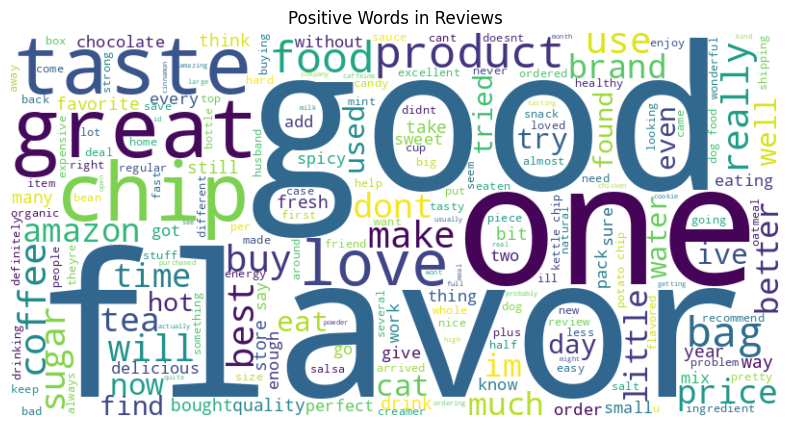

In [ ]:
#Image for positive words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Get positive reviews based on sentiment scores
positive_reviews = [review for review, score in zip(reviews, sentiment_scores) if score > 0]
positive_text = ' '.join(positive_reviews)


# Generate word cloud for positive words
generate_wordcloud(positive_text, 'Positive Words in Reviews')


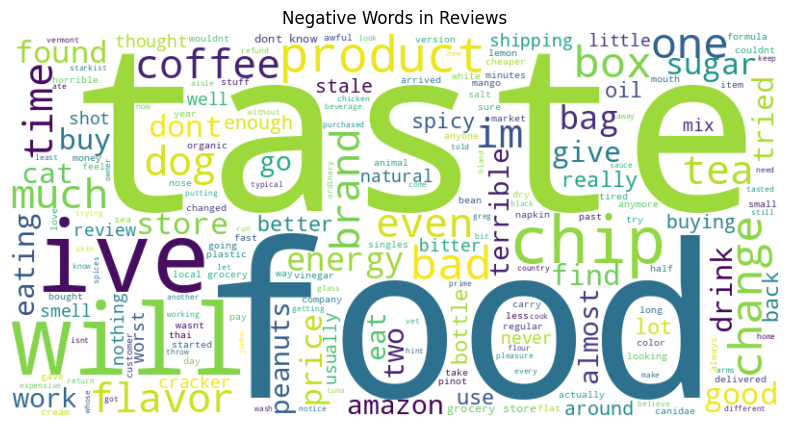

In [ ]:
#Image for negative words
# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Get negative reviews based on sentiment scores
negative_reviews = [review for review, score in zip(reviews, sentiment_scores) if score < 0]
negative_text = ' '.join(negative_reviews)
# Generate word cloud for negative words
generate_wordcloud(negative_text, 'Negative Words in Reviews')